In [13]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
data_dir = Path("D://Estelle/PW166_split_sections_ABBA_June10/qupath/export2")
annotations_filename = data_dir / "PW166-A09_Scan2_[5204,56299]_component_data_merged_Region 5.ome.tif__annotations.tsv"
detections_filename = data_dir / "PW166-A09_Scan2_[5204,56299]_component_data_merged_Region 5.ome.tif__detections.tsv"
assert annotations_filename.exists() and detections_filename.exists()

In [11]:
adf = pd.read_csv(annotations_filename, sep="\t").rename(columns={"Num Subcellular spot: Channel 2 object": "2",  "Num Subcellular spot: Channel 3 object": "3",  "Num Subcellular spot: Channel 4 object": "4",  "Num Subcellular spot: Channel 5 object": "5"})
adf.head()

,Image,Name,Class,Parent,ROI,Centroid X µm,Centroid Y µm,Allen ID,Parent Allen ID,Side,...,Num Negative,Num Positive,2,3,4,5,Positive %,Num Positive per mm^2,Area µm^2,Perimeter µm
0,"PW166-A09_Scan2_[5204,56299]_component_data_me...",Root,NaN,Image,Geometry,3794.0,4991.5,NaN,NaN,NaN,...,10,56705,3547250,414645,62904,72642,99.98,1187.1,47765953.6,37871.2
1,"PW166-A09_Scan2_[5204,56299]_component_data_me...",root,Left: root,Root,Polygon,3768.2,3049.6,997.0,0.0,0.0,...,0,28175,1639299,212787,36741,41646,100.00,1175.1,23976494.7,18962.7
2,"PW166-A09_Scan2_[5204,56299]_component_data_me...",Basic cell groups and regions,Left: grey,root,Geometry,3756.6,2956.4,8.0,997.0,0.0,...,0,27098,1581640,206944,33159,39989,100.00,1244.5,21773971.1,40554.1
3,"PW166-A09_Scan2_[5204,56299]_component_data_me...",Cerebrum,Left: CH,Basic cell groups and regions,Geometry,3631.7,2864.2,567.0,8.0,0.0,...,0,25929,1522212,195821,21263,39044,100.00,1261.9,20547841.5,40666.4
4,"PW166-A09_Scan2_[5204,56299]_component_data_me...",Cerebral nuclei,Left: CNU,Cerebrum,Geometry,4487.4,3305.6,623.0,567.0,0.0,...,0,11452,657026,53195,17784,17044,100.00,1102.1,10390975.6,23860.7


In [20]:
dfl = adf.melt(id_vars=["Name", "Allen ID", "Area µm^2"], value_vars=["2", "3", "4", "5"], value_name="Num Spots", var_name="Channel")
dfl

,Name,Allen ID,Area µm^2,Channel,Num Spots
0,Root,NaN,47765953.60,2,3547250
1,root,997.0,23976494.70,2,1639299
2,Basic cell groups and regions,8.0,21773971.10,2,1581640
3,Cerebrum,567.0,20547841.50,2,1522212
4,Cerebral nuclei,623.0,10390975.60,2,657026
...,...,...,...,...,...
1363,"anterior commissure, temporal limb",908.0,164147.90,5,609
1364,cingulum bundle,940.0,108159.70,5,0
1365,hypothalamus related,824.0,496.53,5,0
1366,medial forebrain bundle,54.0,496.53,5,0


In [21]:
dfl["Spots/um2"] = dfl["Area µm^2"] / dfl["Num Spots"]
dfl.head()

,Name,Allen ID,Area µm^2,Channel,Num Spots,Spots/um2
0,Root,NaN,47765953.6,2,3547250,13.465629
1,root,997.0,23976494.7,2,1639299,14.626066
2,Basic cell groups and regions,8.0,21773971.1,2,1581640,13.766705
3,Cerebrum,567.0,20547841.5,2,1522212,13.498673
4,Cerebral nuclei,623.0,10390975.6,2,657026,15.815167


In [34]:
(adf["Area µm^2"] == 0).sum()

0

In [36]:
(adf["Area µm^2"].isnull()).sum()

0

(0.0, 100000.0)

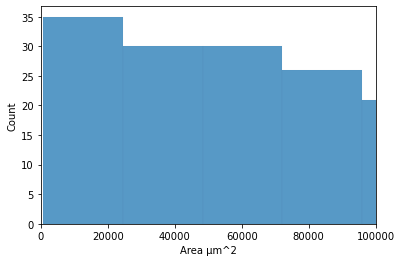

In [32]:
sns.histplot(adf["Area µm^2"], bins=2000)
plt.xlim(0, 0.1e6)

In [24]:
dfl["Spots/um2"].plot.hist()

ValueError: autodetected range of [4.923872679045092, inf] is not finite

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


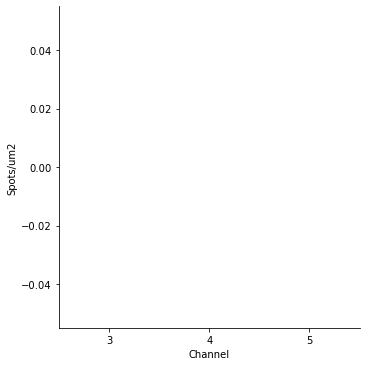

In [23]:
sns.catplot(data=dfl[dfl["Channel"] != "2"], x="Channel", y="Spots/um2", kind="bar",
#             col="Name", col_wrap=5
           );